# Web Book Bayesian Inference


# Chapter 7: Predictive Distributions

# Part 1

Do people prefer to use the word “data” as singular or plural?

$ \theta $ is the proportion of people who think "data" is a singular word




| $\theta$    | Prior Probability | Weighted $\theta$ = Prior Prob $\times \theta$ | Prior Prob $\times \theta^2$ |
| -------- | ------- | ------- | ------- |
| 0.1  | 0.01    | 0.001    | 0.0001    |
| 0.3 | 0.05     | 0.015     | 0.0045     |
| 0.5    | 0.15    | 0.045    | 0.0375    |
| 0.7    | 0.30    | 0.21    | 0.147    |
| 0.9    | 0.49    | 0.441    | 0.3969    |
|        |     | $E(\theta) = 0.742$    | $E(\theta^2) = 0.586$  |

$ \textbf{Prior Predictive Probability} = 0.742 $, 
and 
$ \sigma(\theta) = 0.281$

Not sure if the $\sigma$ above means much... we have our prior distribution above which has a lot more information.  We lose information in characterising the distribution with two values ($\mu, \sigma$) because we must then impose some distribution on the prior e.g. Normal.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import pyjags



Text(0.5, 0, 'Theta')

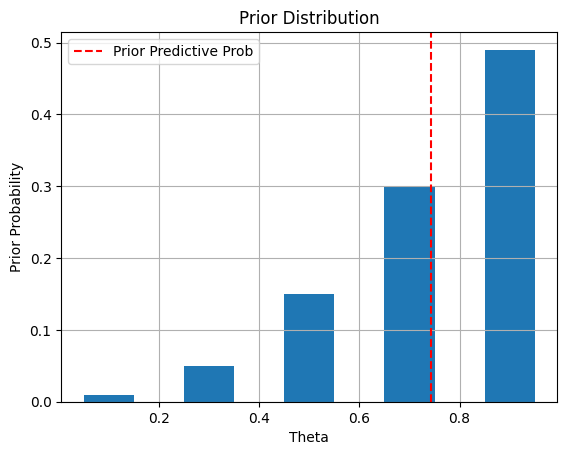

In [3]:
thetas = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
prior_probs = np.array([0.01, 0.05, 0.15, 0.30, 0.49])

weighted_avg = np.sum(thetas * prior_probs)

fig, ax = plt.subplots(1)
ax.grid(True)
ax.bar(thetas, prior_probs, width=0.1)
ax.axvline(weighted_avg, color='red', ls='--', label='Prior Predictive Prob')
ax.legend()
ax.set_title("Prior Distribution")
ax.set_ylabel("Prior Probability")
ax.set_xlabel("Theta")




35 students take part in a survey.  Simulate distributions for each of the prior values (0.1, 0.3, 0.5, 0.7, 0.9) that $Y$ students believe that "data" is a singular noun.

$Y_i \sim \text{binomial}(n=35, p=p_i)$ , where $i \in $ `range(len(priors))`

The Prior Predictive Probability that Y >= 34 students is 0.0600


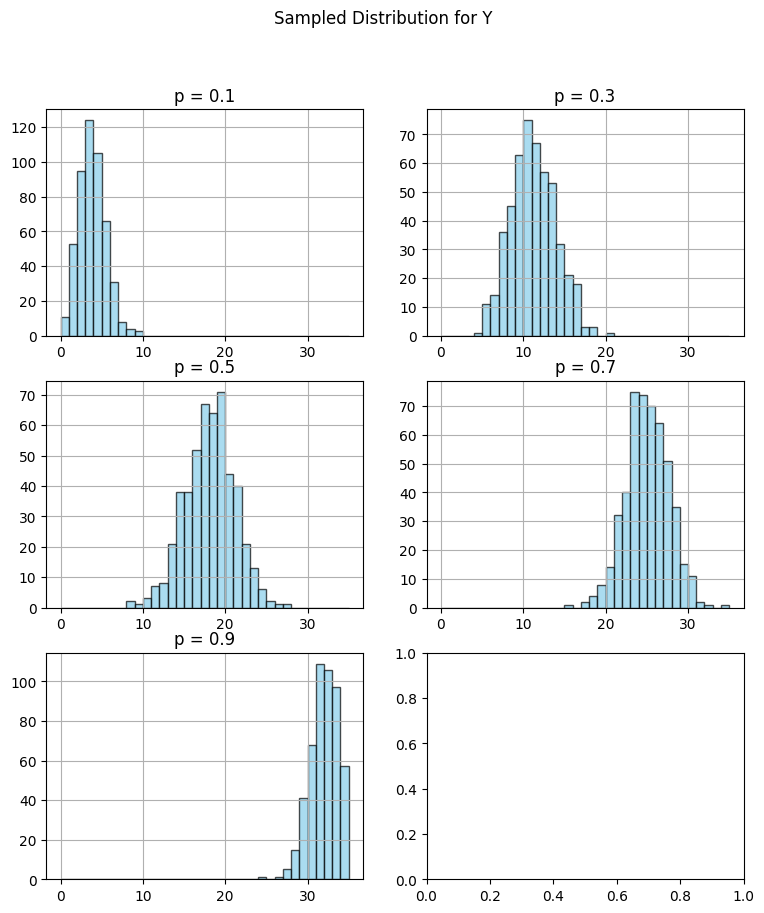

In [4]:
n = 35
sample_size = 500 

fig, axs = plt.subplots(3, 2, figsize=(9, 10))
plt.suptitle("Sampled Distribution for Y")
for i, ax in enumerate(axs.flatten()[0:5]):
    p = thetas[i]
    ax.grid(True)
    ax.set_title('p = {}'.format(p))
    samples = np.random.binomial(n, p, size=sample_size)
    ax.hist(samples, bins=range(n+1), color='skyblue', edgecolor='black', alpha=0.7)


# Prior Predictive Probability that at least 34 out of 35 students believe "data" is a singular noun
prior_predictive_prob = 0

for prior_prob, theta in zip(prior_probs, thetas):
    successful_sample = 1 - scipy.stats.binom.cdf(33, n, theta)
    prior_predictive_prob += successful_sample * prior_prob

print("The Prior Predictive Probability that Y >= 34 students is {:.4f}".format(prior_predictive_prob))


## For the remaining parts, suppose that 31 students in a sample of 35 Cal Poly statistics students prefer data as singular.

`The problem here is normalising the likelihood!! We need to make is so that posterior sums to 1, by dividing by unconditional p(data)`

I have solved this by normalising the posteriors

The Posterior Predictive Probability that Y >= 34 students is 0.5996


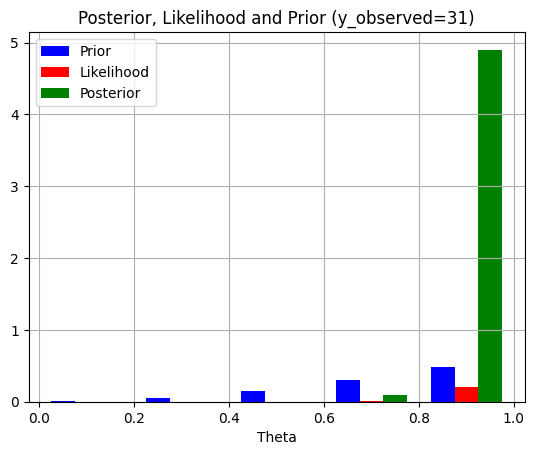

In [5]:
# Posterior = Likelihood * Prior 
y_observed = 31

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = scipy.stats.binom.pmf(y_observed, n, theta) 

posteriors = likelihoods * prior_probs

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(posteriors)[-1] / len(posteriors)
posteriors = posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
width = 0.05
ax.bar(thetas - width, prior_probs, width, color='blue', label='Prior')
ax.bar(thetas, likelihoods, width, color='red', label='Likelihood')
ax.bar(thetas + width, posteriors, width, color='green', label='Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed=31)")
ax.set_xlabel("Theta")

# Posterior Predictive Probability that at least 34 out of 35 students think "data" is a singular noun

posterior_predictive_prob = 0

for posterior, theta in zip(posteriors, thetas):
    successful_sample = 1 - scipy.stats.binom.cdf(33, n, theta)
    posterior_predictive_prob += successful_sample * posterior

print("The Posterior Predictive Probability that Y >= 34 students is {:.4f}".format(posterior_predictive_prob))




# Part 2

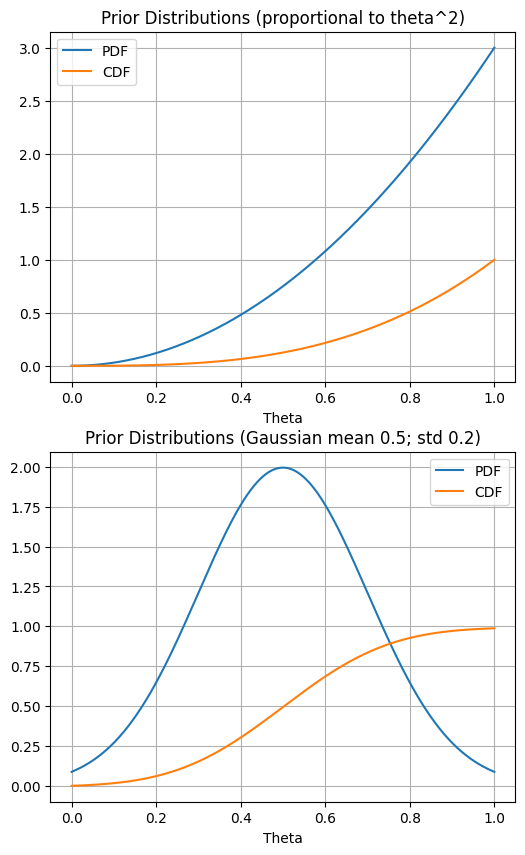

In [6]:
thetas = np.linspace(0, 1, 10001)

# Let my prior be a gaussian centered on 0.5 with standard deviation 0.2

mu = 0.5
sigma = 0.2

gauss_priors = scipy.stats.norm.pdf(thetas, mu, sigma)


# Now assume the prior distribution is proportional to theta^2

priors = 3 * thetas**2 

fig, axs = plt.subplots(2, figsize=(6,10))
axs[0].set_xlabel('Theta')
axs[0].set_title('Prior Distributions (proportional to theta^2)')
axs[0].grid(True)
axs[0].plot(thetas, priors, label = 'PDF')
axs[0].plot(thetas, np.cumsum(priors) / len(priors), label = 'CDF')
axs[0].legend()
axs[1].set_xlabel('Theta')
axs[1].set_title('Prior Distributions (Gaussian mean 0.5; std 0.2)')
axs[1].grid(True)
axs[1].plot(thetas, gauss_priors, label = 'PDF')
axs[1].plot(thetas, np.cumsum(gauss_priors) / len(gauss_priors), label = 'CDF')
axs[1].legend()


# Prior Predictive Distribution

Say we have our prior $p(\theta)$. We want to work out a predictive distribution, weighted by the priors.

$$ p(Evidence | \theta) \sim \text{Binomial}(n=35, p=\theta) $$

$$ p(Evidence) = \Sigma_\theta \left\{p(Evidence | \theta) \times p(\theta)\right\}$$

`Is this correct? Let's write it down below...`

### Quadratic Prior

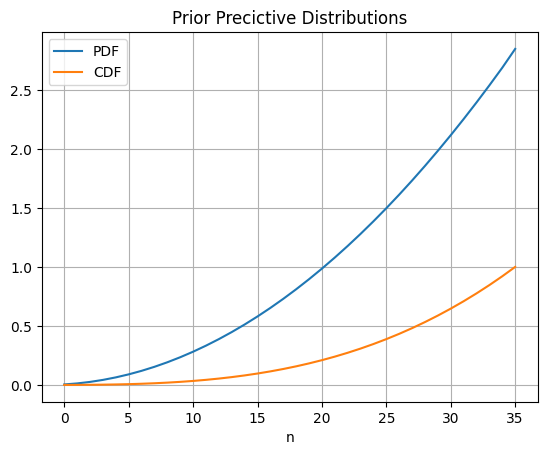

In [7]:
# Prior Predictive Distribution using the theta^2 distribution
n = 35
prior_predictive_dist = np.full(n+1, 0.0)

for prior, theta in zip(priors, thetas):
    theta_dist = scipy.stats.binom.pmf(np.arange(0, n+1, 1), n, theta)
    prior_predictive_dist += theta_dist * prior

# Normalise prior_predictive_dist
prior_predictive_dist /= np.cumsum(prior_predictive_dist)[-1] / len(prior_predictive_dist)

fig, ax = plt.subplots(1)
ax.set_xlabel('n')
ax.set_title('Prior Precictive Distributions')
ax.grid(True)
ax.plot(np.arange(0, n+1, 1), prior_predictive_dist, label = 'PDF')
ax.plot(np.arange(0, n+1, 1), np.cumsum(prior_predictive_dist) / len(prior_predictive_dist), label = 'CDF')
ax.legend()

### Gaussian Prior

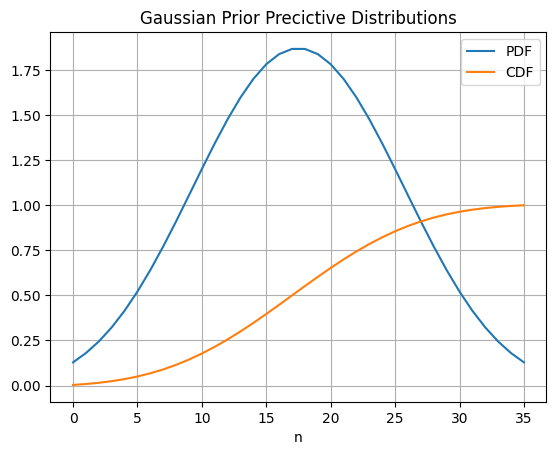

In [8]:
n = 35
gauss_prior_predictive_dist = np.full(n+1, 0.0)


for prior, theta in zip(gauss_priors, thetas):
    theta_dist = scipy.stats.binom.pmf(np.arange(0, n+1, 1), n, theta)
    gauss_prior_predictive_dist += theta_dist * prior

# Normalise prior_predictive_dist
gauss_prior_predictive_dist /= np.cumsum(gauss_prior_predictive_dist)[-1] / len(gauss_prior_predictive_dist)

fig, ax = plt.subplots(1)
ax.set_xlabel('n')
ax.set_title('Gaussian Prior Precictive Distributions')
ax.grid(True)
ax.plot(np.arange(0, n+1, 1), gauss_prior_predictive_dist, label = 'PDF')
ax.plot(np.arange(0, n+1, 1), np.cumsum(gauss_prior_predictive_dist) / len(gauss_prior_predictive_dist), label = 'CDF')
ax.legend()

# Posterior Distribution

Find the posterior distribution over $\theta$ by calculating the likelihood (y_observed = 31 out of 25 trials) and multiplying into the prior.

### Quadratic Prior

In [9]:
# Choose what happened in the test out of 35 candidates

y_observed = 31

Text(0.5, 0, 'Theta')

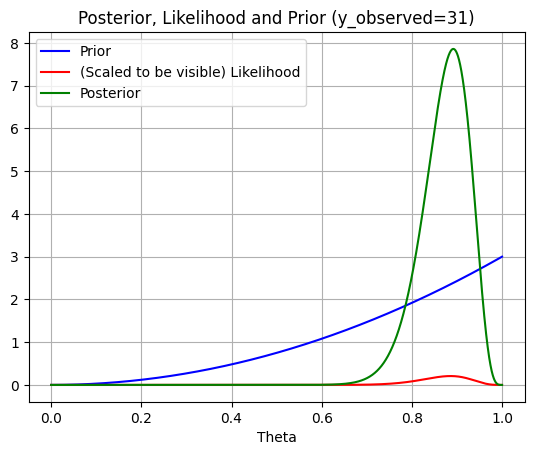

In [10]:
# Posterior = Likelihood * Prior 

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = scipy.stats.binom.pmf(y_observed, n, theta) 

posteriors = likelihoods * priors

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(posteriors)[-1] / len(posteriors)
posteriors = posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, priors, color='blue', label='Prior')
ax.plot(thetas, likelihoods, color='red', label='(Scaled to be visible) Likelihood')
ax.plot(thetas, posteriors, color='green', label='Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed={})".format(y_observed))
ax.set_xlabel("Theta")



### Gaussian Prior

Text(0.5, 0, 'Theta')

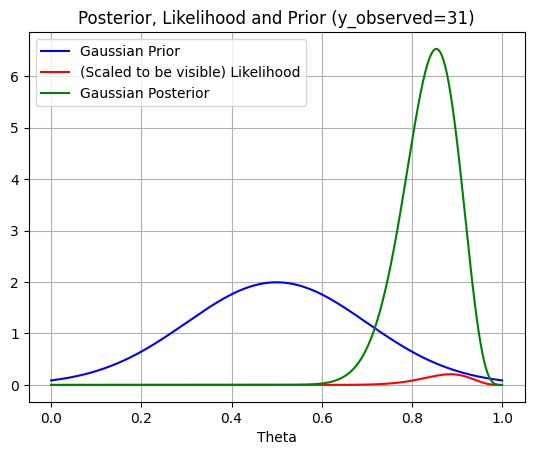

In [11]:
# Posterior = Likelihood * Prior 

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = scipy.stats.binom.pmf(y_observed, n, theta) 

gauss_posteriors = likelihoods * gauss_priors

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(gauss_posteriors)[-1] / len(gauss_posteriors)
gauss_posteriors = gauss_posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, gauss_priors, color='blue', label='Gaussian Prior')
ax.plot(thetas, likelihoods, color='red', label='(Scaled to be visible) Likelihood')
ax.plot(thetas, gauss_posteriors, color='green', label='Gaussian Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed={})".format(y_observed))
ax.set_xlabel("Theta")



## Comparison of Priors

Text(0.5, 0, 'Theta')

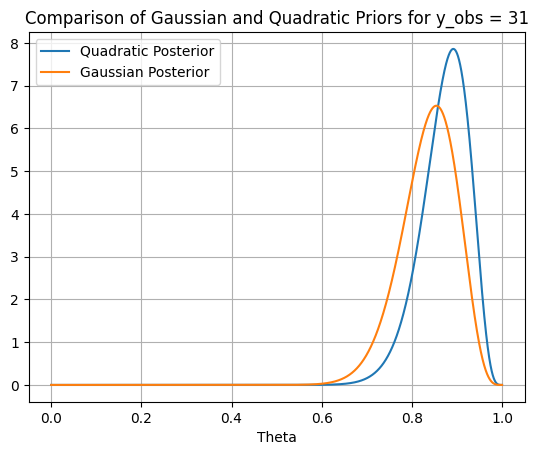

In [12]:
fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, posteriors, label='Quadratic Posterior')
ax.plot(thetas, gauss_posteriors, label='Gaussian Posterior')
ax.legend()
ax.set_title("Comparison of Gaussian and Quadratic Priors for y_obs = {}".format(y_observed))
ax.set_xlabel("Theta")


## Questions Chapter 7

1. What distribution follows from a given prior distribution? E.g. if prior is Gaussian --> posterior is Gaussian.  What about Uniform, Quadratic, Exponential, Beta, Gamma
2. How do we select our priors? 
3. Normalisation of Posterior --> always done by enforcing integral of PDF is 1? 

# Chapter 8: Introduction to Beta Distribution

$f_\beta(u | \alpha, \beta) = u^{\alpha - 1}(1-u)^{\beta - 1}$, $0 < u < 1$

$$ EV = \frac{\alpha}{\alpha + \beta} $$
$$ Var = \frac{(\frac{\alpha}{\alpha + \beta})(1 - \frac{\alpha}{\alpha + \beta})}{\alpha + \beta + 1} $$


Text(0.5, 0, 'u')

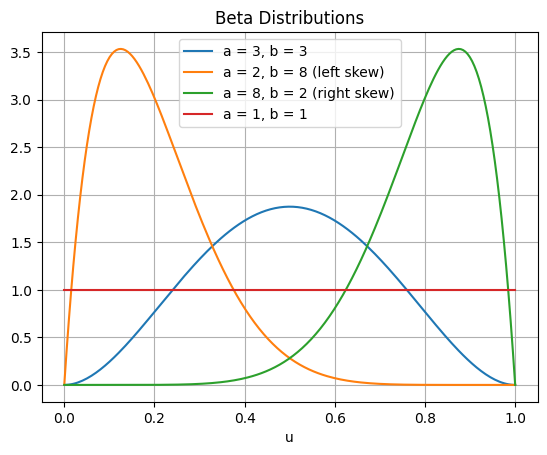

In [13]:
u = np.linspace(0,1,200)


fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(u, scipy.stats.beta.pdf(u, 3, 3), label='a = 3, b = 3')
ax.plot(u, scipy.stats.beta.pdf(u, 2, 8), label='a = 2, b = 8 (left skew)')
ax.plot(u, scipy.stats.beta.pdf(u, 8, 2), label='a = 8, b = 2 (right skew)')
ax.plot(u, scipy.stats.beta.pdf(u, 1, 1), label='a = 1, b = 1')
ax.legend()
ax.set_title("Beta Distributions")
ax.set_xlabel("u")


## Exercise: Calculate the Posterior Distributions for some Beta Distributions
Using the same example as Chapter 7 - 31 out of 35 students believe that 'data' is a singular noun.


Text(0.5, 0, 'theta')

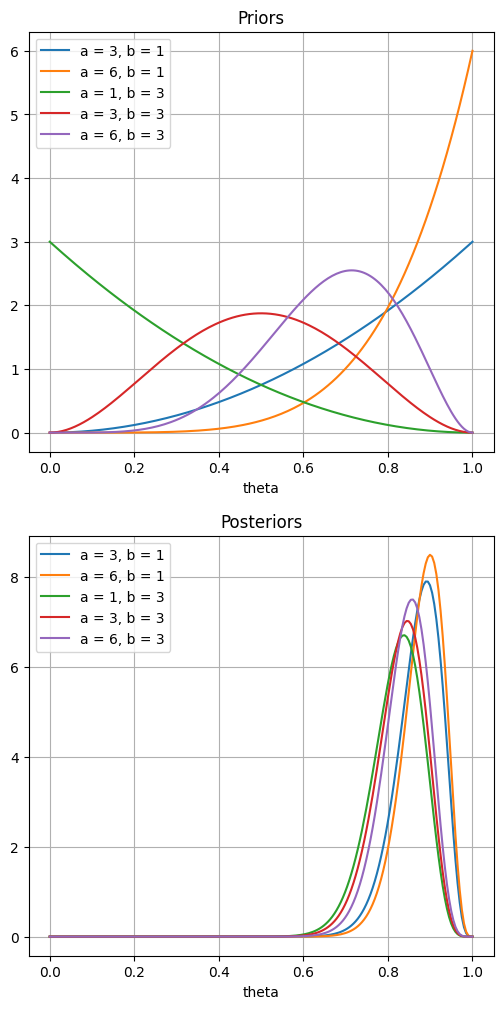

In [14]:
thetas = np.linspace(0,1,200)

# Data 
y_observed = 31
n = 35

# Arrays of prior parameter choices
alpha = np.array([3, 6, 1, 3, 6])
beta = np.array([1, 1, 3, 3, 3])

# Calculate Likelihoods for each theta value
likelihoods = np.full_like(thetas, np.nan)
for i, theta in enumerate(thetas):
    likelihoods[i] = scipy.stats.binom.pmf(y_observed, n, theta) 


# Plot Priors and Posteriors
fig, ax = plt.subplots(2, figsize=(6, 12))
ax[0].grid(True)
ax[1].grid(True)
for alpha, beta in zip(alpha, beta):
    posteriors = likelihoods * scipy.stats.beta.pdf(thetas, alpha, beta)
    norm_factor = np.cumsum(posteriors)[-1] / len(posteriors)
    posteriors = posteriors / norm_factor
    ax[0].plot(thetas, scipy.stats.beta.pdf(thetas, alpha, beta), label='a = {}, b = {}'.format(alpha, beta))
    ax[1].plot(thetas, posteriors, label='a = {}, b = {}'.format(alpha, beta))
ax[0].legend()
ax[1].legend()
ax[0].set_title("Priors")
ax[0].set_xlabel("theta")
ax[1].set_title("Posteriors")
ax[1].set_xlabel("theta")




## Questions Chapter 8

1. What is the posterior distribution if the prior is a Beta?

![alternative text](./beta_binomial.png)

# Chapter 10: Posterior Simulation and JAGS

Suppose we do a study on the proportion of people who are left handed.  Our prior is a Gaussian with mean 0.15 and standard deviation 0.08.  We must truncate the Gaussian at 0 and 1 as the allowed values lie in this region.  Suppose our study shows that 5 out of 25 individuals are left handed.  What is the posterior distribution in this case?

$$ \text{Prior } \pi(\theta) \propto \exp\left(-\frac{(\theta - 0.15)^2}{2 * 0.08^2}\right) $$

$$ \text{Likelihood } f(y | \theta) \propto \theta^5(1-\theta)^{20} $$

$$ \text{Posterior } \pi(\theta | y) \propto \theta^5(1-\theta)^{20}\exp\left(-\frac{(\theta - 0.15)^2}{2 * 0.08^2}\right) $$

## Digression on distribution type

This is an odd distribution which I am not familiar with... Despite the **prior being a Gaussian and the likelihood being a beta distribution**

`If we had set up a prior with a Beta distribution, our posterior would then also be a Beta distribution?`

$$ \text{Prior } \pi(\theta) \propto \theta^{(\alpha - 1)}(1-\theta)^{(\beta - 1)} $$

$$ \text{Likelihood } f(y | \theta) \propto \theta^5(1-\theta)^{20} $$

$$ \text{Posterior } \pi(\theta | y) \propto \theta^{(5 + \alpha - 1)}(1-\theta)^{(20 +\beta - 1)} = \theta^{(\alpha' - 1)}(1-\theta)^{(\beta' - 1)}$$

`Or similarly if our likelihood happened to be Gaussian, we end up with a Gaussian`

$$ \text{Prior } \pi(\theta) \propto \exp\left(-\frac{(\theta - 0.15)^2}{2 * 0.08^2}\right) $$

$$ \text{Likelihood } f(y | \theta) \propto \exp\left(-\frac{(\theta - \mu)^2}{2 \sigma^2}\right) $$

$$ \text{Posterior } \pi(\theta | y) \propto \exp\left(-\frac{(\theta - \mu)^2}{2 \sigma^2}-\frac{(\theta - 0.15)^2}{2 * 0.08^2}\right) $$

Where the exponent is some quadratic in $\theta$ meaning we can complete the square and obtain a new mean, with a multiplicative factor out the front. The prior std and likelihood std combine in some way when we combine the fractions. (**exercise**)


## Returning to Posterior Simulation

How can we plot the posterior in the first case? We use a grid approximation (allow a continuous parameter to be discretised). Although the code is vectorised, we still need N calculations for every parameter in the distribution.  This scales as $N^\text{number of parameters}$.  In the case below, $N=1000$, and the number of parameters is just 1.

Text(0.5, 0, 'theta')

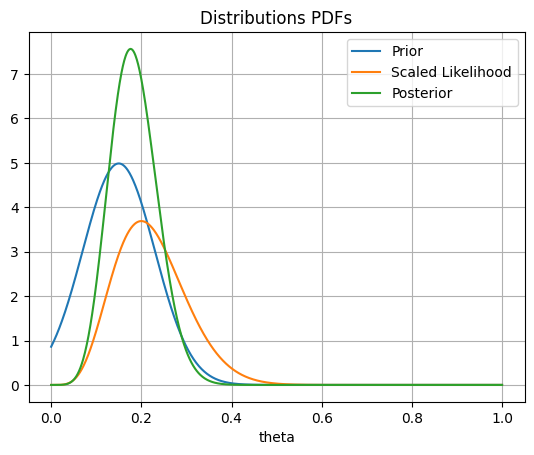

In [15]:
thetas = np.linspace(0, 1, 1001)

priors = scipy.stats.norm.pdf(thetas, 0.15, 0.08)

scale_factor = 1000000
likelihoods = thetas**5 * (1 - thetas)**20

posteriors = likelihoods * priors
posteriors = posteriors * len(posteriors) / sum(posteriors)

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, priors, label="Prior")
ax.plot(thetas, scale_factor * likelihoods, label="Scaled Likelihood")
ax.plot(thetas, posteriors, label="Posterior")
ax.legend()
ax.set_title("Distributions PDFs")
ax.set_xlabel("theta")

In a different study, the number of people who kiss with their heads tilted to the right is investigated with the suspicion that more prefer to tilt their heads to the right than to the left. Our prior for the **proportion of people who tilt their head to the right** is the following

| $\theta$    | Prior Probability |
| -------- | ------- |
| 0.1  | 1/9   |
| 0.3 | 2/9     |
| 0.5  | 3/9    |
| 0.7 | 2/9     |
| 0.9  | 1/9    |

The data shows that 8 out of 12 tilt their heads to the right when kissing.

- Suppose it were 800 out of 1200?
- Say we use a Beta prior instead of a discrete prior with only 5 values
- How much does the compute time go up? 

Text(0.5, 0, 'theta')

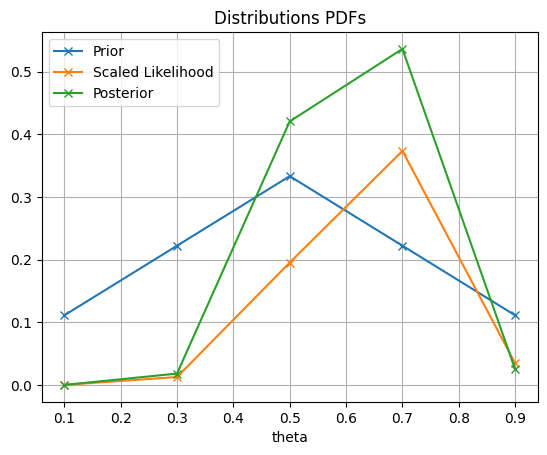

In [16]:
thetas = np.array([0.1, 0.3, 0.5, 0.7, 0.9])

priors = np.array([1/9, 2/9, 3/9, 2/9, 1/9])

scale_factor = 800
likelihoods = thetas**8 * (1 - thetas)**4

posteriors = likelihoods * priors
posteriors = posteriors / sum(posteriors)

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, priors, label="Prior", marker='x')
ax.plot(thetas, scale_factor * likelihoods, label="Scaled Likelihood", marker='x')
ax.plot(thetas, posteriors, label="Posterior", marker='x')
ax.legend()
ax.set_title("Distributions PDFs")
ax.set_xlabel("theta")

# JAGS = Just Another Gibbs Sampler

This is a library to sample from posteriors. Called `pyjags`, it uses a mixture of Metropolis sampling, Gibbs Sampling and MCMC algorithms

## Questions: What is MCMC? 

# Chapter 11: Odds and Bayes Factors

A few facts
- HIV test is 97.7% accurate when diagnosing a patient with HIV 
- HIV test is 92.6% accurate when diagnosing a patient without HIV
- Estimated that 0.5% of population have HIV 

Let $H$ mean HIV positive, and $E$ be tests positive.  Find the probability that you have HIV given you test positive (in other words, $P(H|E)$)

$$ P(H|E) = \frac{P(E|H)P(H)}{P(E)} $$

$$ P(H|E) = \frac{P(E|H)P(H)}{P(E|H)p(H) + P(E|H')p(H')} $$

$$ P(H|E) = \frac{0.977 \times 0.005}{0.977\times 0.005 + (1-0.926)\times 0.995} $$

$$ P(H|E) = 0.0660 $$

So you have a 6.60% chance of having HIV if you test positive with these statistics.

**Odds**, such as in betting, are defined as 

$$ \text{odds}(A) =  \frac{P(A)}{P(A')} = \frac{P(A)}{1-P(A)}$$

Which means that 

$$ P(A) = \frac{\text{odds(A)}}{1 + \text{odds(A)}} $$

`Pot Odds in Poker`

If someone bets $r$ times pot, how much equity must we have to call on average? 

Suppose the event that we lose is $A$. If we lose, we lose $r$ times pot.  If we win, we win $1 + r$. 

In order for us to justify a call and break even, we must be winning a certain proportion, $p$, of the time.

So we need the following to be true 

$$p (1 + r) - (1 - p) r = 0$$

Rearranging, 

$$ p = \frac{r}{1 + 2r} $$

`Ok it's a bit different`

**Bayes Factor**

This is the posterior probability divided by the prior probability.  In the HIV example above, 

$$ \text{Bayes Factor} = \frac{0.0660}{0.005} \approx 13.2$$

# Chapter 12 Bayesian Model Comparison 

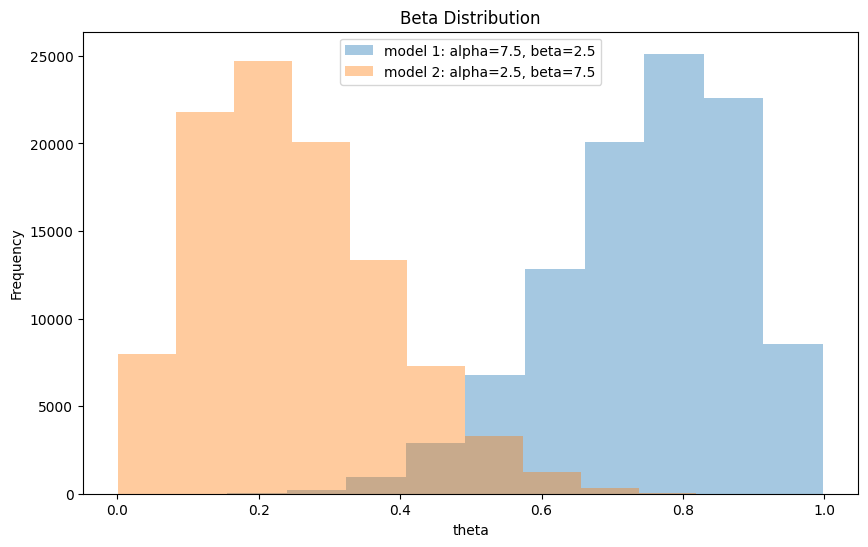

probability of 6 heads in 10 coin flips given model 1: 0.12393719216635454 where theta = 0.7501295301401506 (mean over 100000 samples)
probability of 6 heads in 10 coin flips given model 2: 0.041600234933515 where theta = 0.24896979227281185 (mean over 100000 samples)


In [17]:
# plot theta as histogram
num_samples = 100000
theta_1 = scipy.stats.beta.rvs(7.5, 2.5, size=num_samples)
theta_2 = scipy.stats.beta.rvs(2.5, 7.5, size=num_samples)
plt.figure(figsize=(10, 6))
plt.hist(theta_1, alpha=0.4, label='model 1: alpha=7.5, beta=2.5')
plt.hist(theta_2, alpha=0.4, label='model 2: alpha=2.5, beta=7.5')
plt.title('Beta Distribution')
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.legend()
plt.show();

p_model_1 = scipy.stats.binom.pmf(6, 10, theta_1)  # P(X = 6) for Binomial(n=10, p=theta_1)
p_model_2 = scipy.stats.binom.pmf(6, 10, theta_2)  # P(X = 6) for Binomial(n=10, p=theta_2)

print(f"probability of 6 heads in 10 coin flips given model 1: {np.mean(p_model_1)} where theta = {np.mean(theta_1)} (mean over {num_samples} samples)")
print(f"probability of 6 heads in 10 coin flips given model 2: {np.mean(p_model_2)} where theta = {np.mean(theta_2)} (mean over {num_samples} samples)")



Given models 1 and 2 are equally as likely before any observation, 
$$ \text{bayes factor for model }1 = \frac{p(M=2|X=6)}{p(M=2)} = 1.49 $$
$$ \text{bayes factor for model }2 = \frac{p(M=2|X=6)}{p(M=2)} = 0.51 $$

Posterior probability of models 1 and 2 are 
$$ \text{Posterior probability of model }1 = 0.75$$
$$ \text{Posterior probability of model }2 = 0.25$$

Now suppose that the probability of model 1 before the observation was 0.1, and the probability of model 2 was 0.9. 

Posterior probability of models 1 and 2 are now
$$ \text{Posterior probability of model }1 = 0.96$$
$$ \text{Posterior probability of model }2 = 0.04$$ 

Now calculate the probability that X=7 out of 10 flips given the 50/50 prior on the model probabilities. So we use the posterior model probabilities after observing X=6 to then calculate the X=7 case. 

I.e., $P(M=1)=0.75$ and $P(M=2)=0.25$.

## Beta Distribution and Binomial Probability

The Beta distribution is the conjugate prior to the binomial distribution. A quick derivation below: 

$$ \theta \sim \text{Beta}(\alpha, \beta) $$

$$ \text{We want to show that }\theta | \text{data} \sim \text{Beta}(\alpha + h, \beta + t) \text{ where h and t are num heads / tails}$$ 

$$ \text{For Beta prior, }p(\theta) \propto \theta^{\alpha-1}(1-\theta)^{\beta-1}$$

$$ \text{Posterior is }p(\theta | D) \propto p(D|\theta)p(\theta) \text{ where } p(D|\theta) = \binom{n}{h}\theta^h(1-\theta)^t$$

$$ p(\theta | D) \propto \theta^{\alpha+h-1}(1-\theta)^{\beta+t-1} = \text{Beta}(\alpha + h, \beta + t)$$ 

Returning to our example, we observe 6 heads and 4 tails, meaning our posterior (assuming model 1 prior) becomes $\text{Beta}(7.5 + 6, 2.5 +4) = \text{Beta}(13.5, 6.5)$. The posterior changes shape with number of observation, as we can see below. For example, instead of observing 6 heads out of 10, let's say we observe 600 heads out of 1000. The posterior becomes much tighter around the value 60%.



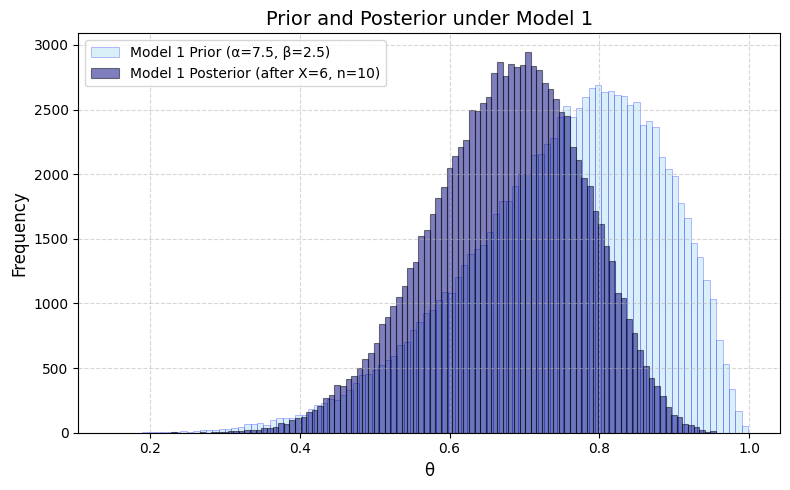

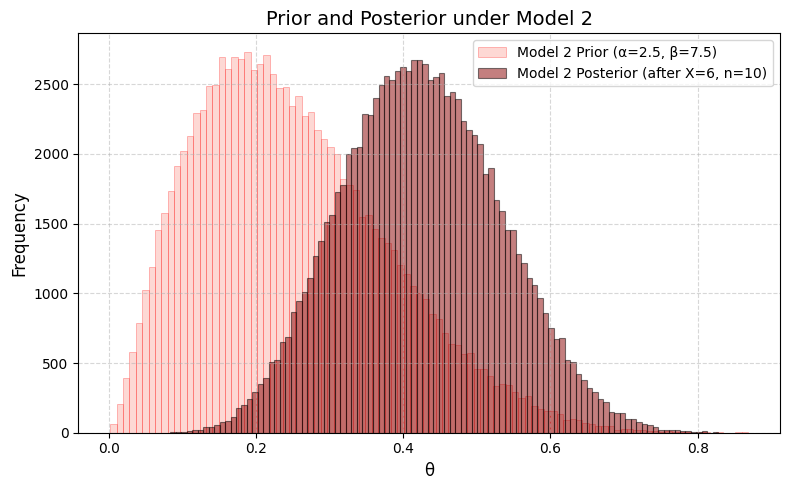

In [18]:
# Show prior vs posterior for model 1
H = 6
T = 10-H

num_samples = 100000
theta_prior_1 = scipy.stats.beta.rvs(7.5, 2.5, size=num_samples)
theta_posterior_1 = scipy.stats.beta.rvs(7.5 + H, 2.5 + T, size=num_samples)  # observe 6 heads and 4 tails
plt.figure(figsize=(8, 5))
plt.hist(theta_prior_1, bins=100, alpha=0.3, color='skyblue', label='Model 1 Prior (α=7.5, β=2.5)', edgecolor='blue', linewidth=0.6)
plt.hist(theta_posterior_1, bins=100, alpha=0.5, color='navy', label=f'Model 1 Posterior (after X={H}, n={H+T})', edgecolor='black', linewidth=0.8)
plt.title('Prior and Posterior under Model 1', fontsize=14)
plt.xlabel('θ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

theta_prior_2 = scipy.stats.beta.rvs(2.5, 7.5, size=num_samples)
theta_posterior_2 = scipy.stats.beta.rvs(2.5 + H, 7.5 + T, size=num_samples)
plt.figure(figsize=(8, 5))
plt.hist(theta_prior_2, bins=100, alpha=0.3, color='salmon', label='Model 2 Prior (α=2.5, β=7.5)', edgecolor='red', linewidth=0.6)
plt.hist(theta_posterior_2, bins=100, alpha=0.5, color='darkred', label=f'Model 2 Posterior (after X={H}, n={H+T})', edgecolor='black', linewidth=0.8)
plt.title('Prior and Posterior under Model 2', fontsize=14)
plt.xlabel('θ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Model Averaging 

#### How do we combine the priors of model 1 and model 2 to pick the best posterior, weighted by priors? 

Let's assume now that we had a 50/50 prior for model 1 and 2. We then observe 6 heads on the first round. We want to update our probabilities of model 1 and model 2: we think model 1 is 2.95 times more likely than model 2 (from taking the ratio of the likelihood of X=6|model 1 to the likelihood of X=6|model 2). Therefore we can assign $\frac{1}{2.95 + 1}$ to model 2, and $\frac{2.95}{2.95 + 1}$ to model 1. This equates to 

|             | Model 1 | Model 2 |
|-------------|---------|---------|
| Probability |  0.747  |   0.253 |

The code below shows us how to combine the models given an initial prior of 50/50 and the observation of 6 heads.

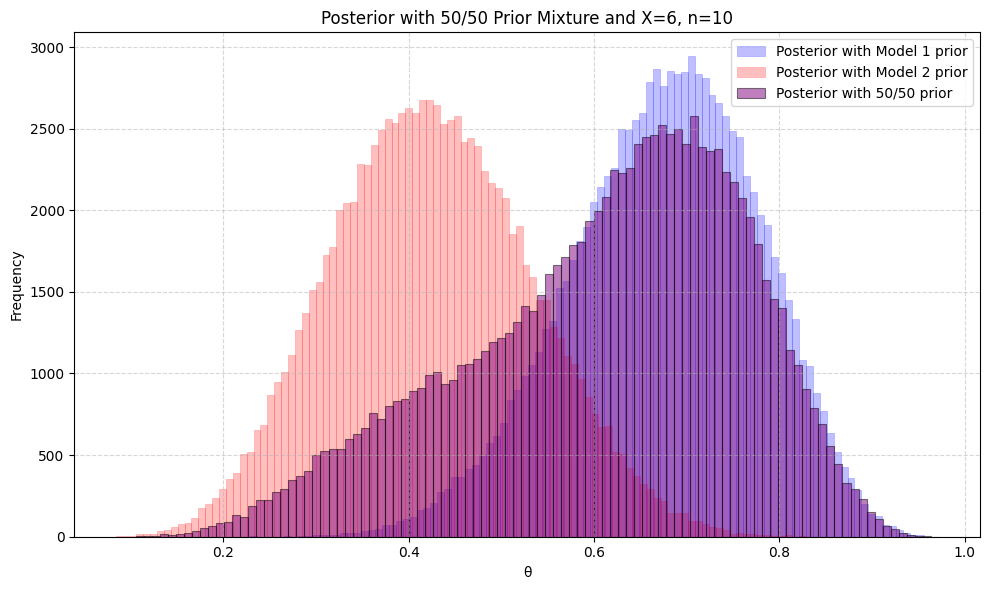

Probability of X=7, n=10 is 0.17892


In [19]:
alpha_vals = np.array([7.5, 2.5]) + H  # [13.5, 8.5]
beta_vals = np.array([2.5, 7.5]) + T   # [6.5, 11.5]

# Mixture model: choose model index 0 or 1 with given probabilities
model = np.random.choice([0, 1], size=num_samples, p=[0.747, 0.253])

# Sample theta from a beta distribution for each model selection
theta = scipy.stats.beta.rvs(a=alpha_vals[model], b=beta_vals[model])
plt.figure(figsize=(10, 6))
plt.hist(theta_posterior_1, bins=100, alpha=0.25, color='blue', label='Posterior with Model 1 prior', edgecolor='blue', linewidth=0.5)
plt.hist(theta_posterior_2, bins=100, alpha=0.25, color='red', label='Posterior with Model 2 prior', edgecolor='red', linewidth=0.5)
plt.hist(theta, bins=100, alpha=0.5, color='purple', label='Posterior with 50/50 prior', edgecolor='black', linewidth=0.8)
plt.title(f'Posterior with 50/50 Prior Mixture and X={H}, n={H+T}')
plt.xlabel('θ')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show();

# Sample y from a binomial distribution with n=10 and probability=theta
y = scipy.stats.binom.rvs(n=10, p=theta)
print(f'Probability of X=7, n=10 is {np.sum(y==7) / len(y)}')

# Poisson and Gamma distribution 

If we have an event with Poissonian likelihood, we may use a Gamma distributed prior and retrieve a Gamma distributed posterior

$$
\text{Prior: } p(\lambda) \propto \lambda^{\alpha - 1} e^{-\beta \lambda}
$$

$$
\text{Poissonian event likelihood: } p(x \mid \lambda) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

$$
\text{Posterior: } p(\lambda \mid x) \propto p(x \mid \lambda) \cdot p(\lambda)
$$

$$
\text{Which simplifies to: } p(\lambda \mid x) \propto \lambda^{(x + \alpha) - 1} e^{-(\beta + 1)\lambda}
$$

So given a prior distribution $\text{Gamma}(\alpha, \beta)$, and some observation $X=x$ from some Poissonian likelihood, we end up with a posterior equal to $\text{Gamma}(\alpha+x, \beta+1)$.

# Prior Distributions with Multiple Parameters

Let's suppose we want to fit our predictive distribution using multiple parameters, e.g. we want a predictive distribution to represent the mean and standard deviation of the underlying data. We use a Bayesian approach, but it's not as straight forward to maximise the posterior probability now that we have two parameters to search for. If we have just two distribution parameters, we have already squared the number of 'points' we need to compute to find that with the highest posterior probability. If we work with conjugate priors, we can find closed form solutions to the posteriors which makes the computation easier, but usually we need to approximate the solution.

## Sampling Method: Markov Chain Monte Carlo (MCMC)

Let's follow an example to learn MCMC 

A politician campaigns on a long east-west chain of islands. At the end of each day she decides to stay on her current island, move to the island to the east, or move to the island to the west. Her goal is to visit all the islands proportional to their population, so that she spends the most days on the most populated island, and proportionally fewer days on less populated islands. But, (1) she doesn’t know how many islands there are, and (2) she doesn’t know the population of each island. However, when she visits an island she can determine its population. And she can send a scout to the east/west adjacent islands to determine their population before visiting. How can the politician achieve her goal in the long run?

Suppose that every day, the politician makes her travel plans according to the following algorithm.

- She flips a fair coin to propose travel to the island to the east (heads) or west (tails). (If there is no island to the east/west, treat it as an island with population zero below.)
If the proposed island has a population greater than that of the current island, then she travels to the proposed island.
If the proposed island has a population less than that of the current island, then:
- She computes $a$, the ratio of the population of the proposed island to the current island.
- She travels to the proposed island with probability $a$,
- And with probability $1−a$ she spends another day on the current island.

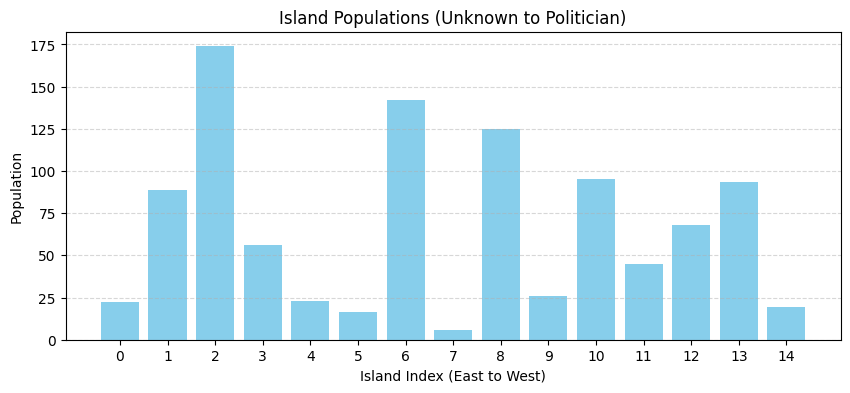

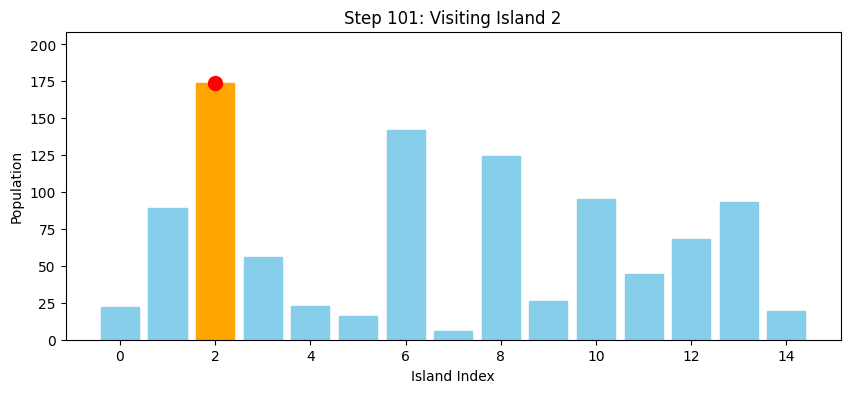

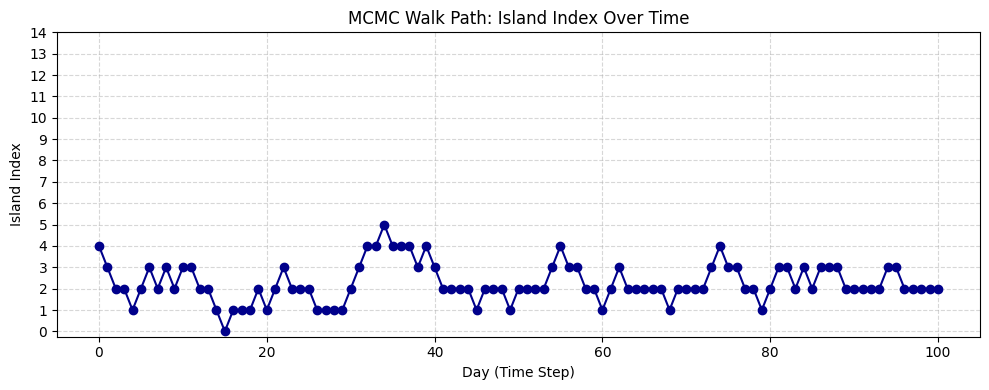

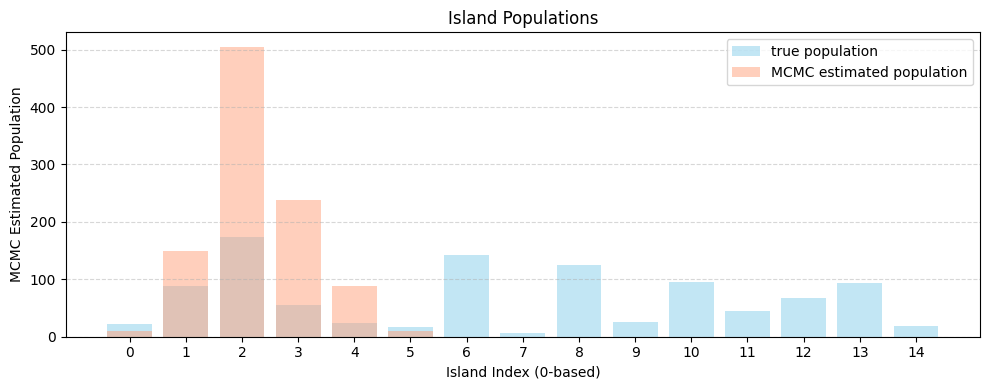

In [20]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Seed for reproducibility
np.random.seed(42)

# Number of islands (known to us, unknown to the politician)
num_islands = 15

# Simulated population for each island
populations = np.random.randint(10, 1000, size=num_islands)
populations = populations / sum(populations) * 1000

# Plot island populations
plt.figure(figsize=(10, 4))
plt.bar(range(num_islands), populations, color='skyblue')
plt.xlabel("Island Index (East to West)")
plt.ylabel("Population")
plt.title("Island Populations (Unknown to Politician)")
plt.xticks(range(num_islands))
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# MCMC walk parameters
num_steps = 100
positions = [np.random.randint(0, num_islands)]  # Start position

# Simulate the MCMC walk
for _ in range(num_steps):
    current = positions[-1]
    direction = 1 if np.random.rand() < 0.5 else -1
    proposed = current + direction

    current_pop = populations[current]
    proposed_pop = populations[proposed] if 0 <= proposed < num_islands else 0

    if proposed_pop >= current_pop:
        positions.append(proposed if 0 <= proposed < num_islands else current)
    else:
        a = proposed_pop / current_pop
        if np.random.rand() < a and 0 <= proposed < num_islands:
            positions.append(proposed)
        else:
            positions.append(current)

# Create the animation
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(range(num_islands), populations, color='skyblue')

# Initialize red dot with valid data
initial_pos = positions[0]
point, = ax.plot([initial_pos], [populations[initial_pos]], 'ro', markersize=10)

ax.set_ylim(0, max(populations) * 1.2)
ax.set_title("Step-by-step MCMC Walk")
ax.set_xlabel("Island Index")
ax.set_ylabel("Population")

# Update function for animation
def update(frame):
    for i in range(num_islands):
        bars[i].set_color('skyblue')
    current_pos = positions[frame]
    bars[current_pos].set_color('orange')
    point.set_data([current_pos], [populations[current_pos]])
    ax.set_title(f"Step {frame+1}: Visiting Island {current_pos}")
    return bars, point

# Build animation
ani = FuncAnimation(fig, update, frames=len(positions), interval=200, blit=False, repeat=False);

# Display animation in Jupyter
anim_html = HTML(ani.to_jshtml())

# number of visits to an island approximates the population of that island according to the rules for the random walk 
visit_counts = np.bincount(positions, minlength=num_islands)
estimated_populations = visit_counts / np.sum(visit_counts) * 1000  # Scale to match true pop scale

# Plot trajectory: day vs island index
plt.figure(figsize=(10, 4))
plt.plot(range(len(positions)), positions, marker='o', linestyle='-', color='darkblue')
plt.title("MCMC Walk Path: Island Index Over Time")
plt.xlabel("Day (Time Step)")
plt.ylabel("Island Index")
plt.yticks(range(num_islands))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot island populations
plt.figure(figsize=(10, 4))
plt.bar(range(num_islands), populations, color='skyblue', alpha=0.5, label='true population')  # island 1 is index 0
plt.bar(range(num_islands), estimated_populations, alpha=0.5, color='#FFA07A', label='MCMC estimated population')  # island 1 is index 0
plt.xlabel("Island Index (0-based)")
plt.ylabel("MCMC Estimated Population")
plt.title("Island Populations")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(np.arange(num_islands))
plt.legend()
plt.tight_layout()
plt.show()

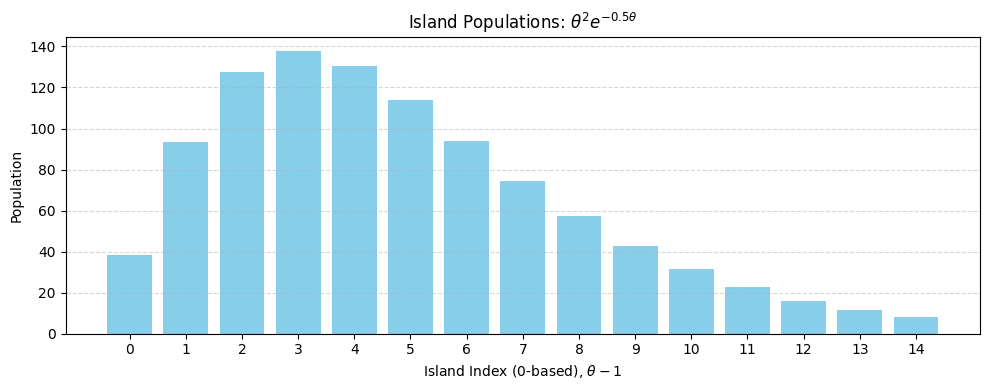

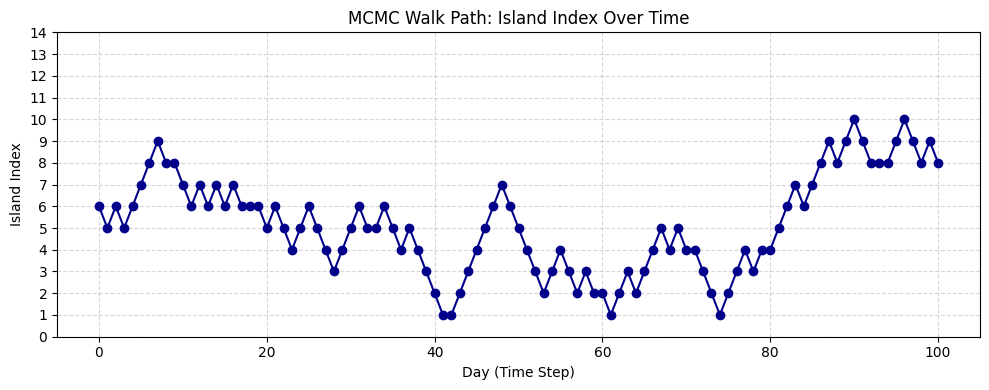

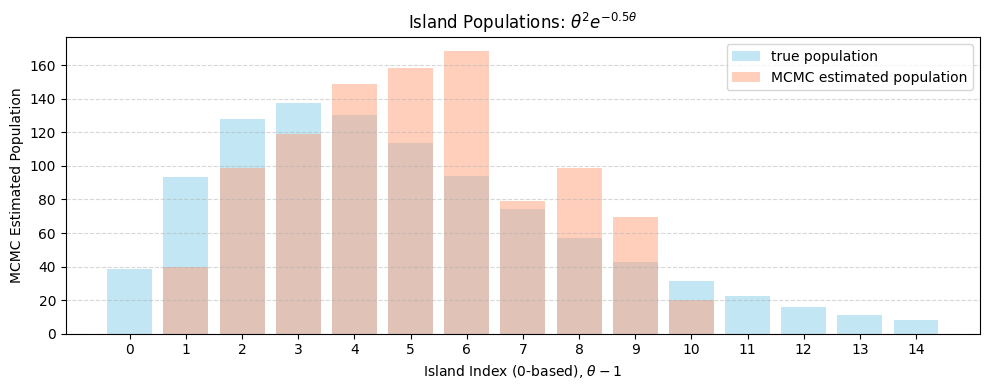

In [21]:
# Island parameters
num_islands = 15
theta = np.arange(1, num_islands + 1)  # Island indices (1 through 15)

# Deterministic population function: theta^2 * exp(-0.5 * theta)
populations = theta**2 * np.exp(-0.5 * theta)
populations = populations / np.sum(populations) * 1000  # Scale to max ~1000 for visibility

# Plot island populations
plt.figure(figsize=(10, 4))
plt.bar(theta - 1, populations, color='skyblue')  # island 1 is index 0
plt.xlabel("Island Index (0-based), $\\theta-1$")
plt.ylabel("Population")
plt.title("Island Populations: $\\theta^2 e^{-0.5\\theta}$")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(np.arange(num_islands))
plt.tight_layout()
plt.show()

# MCMC Walk (Metropolis-like)
np.random.seed(42)
num_steps = 100
positions = [np.random.randint(0, num_islands)]

for _ in range(num_steps):
    current = positions[-1]
    direction = 1 if np.random.rand() < 0.5 else -1
    proposed = current + direction

    current_pop = populations[current]
    proposed_pop = populations[proposed] if 0 <= proposed < num_islands else 0

    if proposed_pop >= current_pop:
        positions.append(proposed if 0 <= proposed < num_islands else current)
    else:
        a = proposed_pop / current_pop
        if np.random.rand() < a and 0 <= proposed < num_islands:
            positions.append(proposed)
        else:
            positions.append(current)

# Plot MCMC walk path: Day vs Island index
plt.figure(figsize=(10, 4))
plt.plot(range(len(positions)), positions, marker='o', linestyle='-', color='darkblue')
plt.title("MCMC Walk Path: Island Index Over Time")
plt.xlabel("Day (Time Step)")
plt.ylabel("Island Index")
plt.yticks(np.arange(num_islands))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# number of visits to an island approximates the population of that island according to the rules for the random walk 
visit_counts = np.bincount(positions, minlength=num_islands)
estimated_populations = visit_counts / np.sum(visit_counts) * 1000  # Scale to match true pop scale

# Plot island populations
plt.figure(figsize=(10, 4))
plt.bar(theta - 1, populations, color='skyblue', alpha=0.5, label='true population')  # island 1 is index 0
plt.bar(theta - 1, estimated_populations, alpha=0.5, color='#FFA07A', label='MCMC estimated population')  # island 1 is index 0
plt.xlabel("Island Index (0-based), $\\theta-1$")
plt.ylabel("MCMC Estimated Population")
plt.title("Island Populations: $\\theta^2 e^{-0.5\\theta}$")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(np.arange(num_islands))
plt.legend()
plt.tight_layout()
plt.show()

# Another Example with two model parameters

## Gibbs Sampling and JAGS (pyjags)

Suppose we wish to estimate the number of 3-point attempts from Curry, and his probability of success with each shot. We begin with some priors for the number of shots $N$ and the probability of success $p$.

$$ \text{We use Poissonian prior for }N\sim Po(\mu)$$ 

$$ \text{Conditional on }\mu, p\text{ we use the Binomial for num successful shots }Y\sim Bin(n,p) $$

Notice the second distribution is dependent on both parameters, $(\mu, p)$, because we need to simulate $n$, the number of shots in that game.

For our priors, let's use a Gamma and Beta distibution for $\mu$ and $n$ respectively as these are conjugates for the 'trial' distributions.

$$ \mu \sim Gamma(10,2) $$

$$ n \sim Beta(4,6) $$

The likelihood function is the probability that we observe $(n, y)$ given $(\mu, p)$:

$$ 
f((n, y) \mid \mu, p) \propto \left( e^{-\mu} \frac{\mu^n}{n!} \right) \left( p^y (1 - p)^{n - y} \right)
$$ 

The posterior distribution $\pi(\mu, p|\text{Data})$ is 
$$ \pi(\mu, p|\text{Data}) \propto p(\mu, p|n=10, p=4) * p(\mu, p|n=11, p=6)$$ 
$$ \pi(\mu, p|\text{Data}) \propto \left( e^{-\mu} \mu^{10} p^4 (1 - p)^{6} \right)\left( e^{-\mu} \mu^{11} p^6 (1 - p)^{4} \right) $$ 




adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
updating: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 30000 of 30000, elapsed 0:00:00, remaining 0:00:00


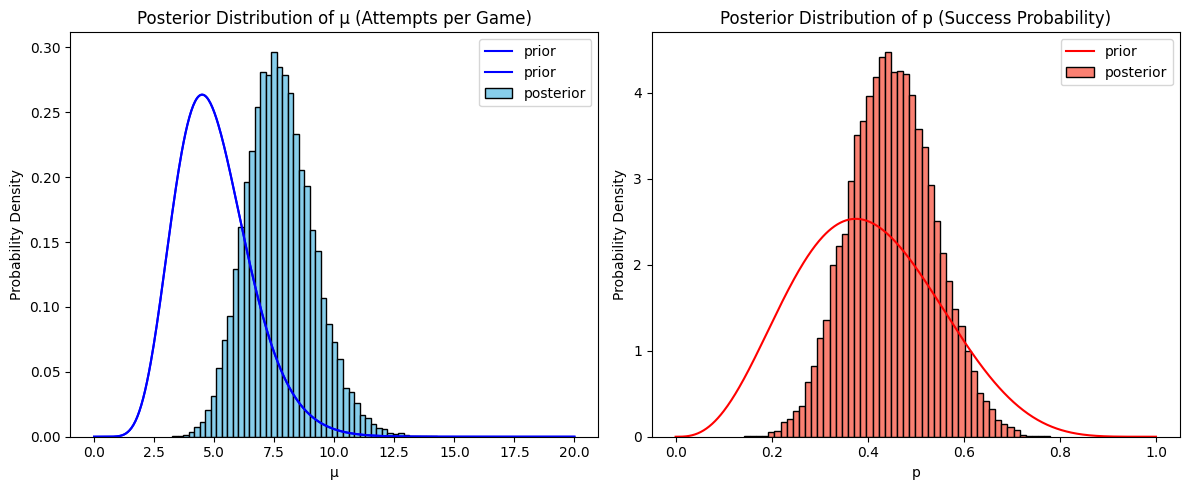

Posterior mean of μ: 7.749
Posterior mean of p: 0.451


In [44]:
# Observed data from two games
N_obs = np.array([10, 11])  # Number of attempts
Y_obs = np.array([4, 6])    # Number of successful shots

# Package data into a dictionary for JAGS
data = {
    'N_games': len(N_obs),
    'N': N_obs.tolist(),
    'Y': Y_obs.tolist()
}

# JAGS model specification
model_string = """
model {
    for (i in 1:N_games) {
        N[i] ~ dpois(mu)
        Y[i] ~ dbin(p, N[i])
    }
    mu ~ dgamma(10, 2)  # Prior for mu (attempt rate)
    p ~ dbeta(4, 6)     # Prior for p (success probability)
}
"""

# Initialize and compile the model
model = pyjags.Model(code=model_string, data=data, chains=3)

# Burn-in phase (adaptation)
model.update(1000)

# Draw samples from the posterior
samples = model.sample(10000, vars=['mu', 'p'])

# Extract and flatten samples for each parameter
mu_samples = samples['mu'].reshape(-1)
p_samples = samples['p'].reshape(-1)

# Plot prior and posterior distributions
x_mu = np.linspace(0, 20, 500)
prior_mu_pdf = scipy.stats.gamma.pdf(x_mu, a=10, scale=1/2)  # Note: scale = 1/rate = 1/2

x_p = np.linspace(0, 1, 500)
prior_p_pdf = scipy.stats.beta.pdf(x_p, a=4, b=6)


# Plot the posterior distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_mu, prior_mu_pdf, color='blue', label='prior')
plt.plot(x_mu, prior_mu_pdf, color='blue', label='prior')
plt.hist(mu_samples, bins=50, color='skyblue', edgecolor='black', density=True, label='posterior')
plt.title('Posterior Distribution of μ (Attempts per Game)')
plt.legend()
plt.xlabel('μ')
plt.ylabel('Probability Density')

plt.subplot(1, 2, 2)
plt.plot(x_p, prior_p_pdf, color='red', label='prior')
plt.hist(p_samples, bins=50, color='salmon', edgecolor='black', density=True, label='posterior')
plt.title('Posterior Distribution of p (Success Probability)')
plt.legend()
plt.xlabel('p')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

# Print posterior means as point estimates
print(f"Posterior mean of μ: {np.mean(mu_samples):.3f}")
print(f"Posterior mean of p: {np.mean(p_samples):.3f}")



# How does pyjags, Gibbs Sampling and MCMC work? 

Firstly, pyjags is a library which converts string (seen below as model code variable) into a model which uses a prior distribution (specified in the string) to compute optimal parameters given some data (forms the posterior distribution to maximise the likelihood of the data). This is done using Gibbs sampling under the hood, which does the following: 

\begin{align*}
\theta_1^{(t)} &\sim p\big(\theta_1 \mid \theta_2^{(t-1)}, \theta_3^{(t-1)}, \ldots, \theta_k^{(t-1)}\big) \\
\theta_2^{(t)} &\sim p\big(\theta_2 \mid \theta_1^{(t)}, \theta_3^{(t-1)}, \ldots, \theta_k^{(t-1)}\big) \\
&\ \ \vdots \\
\theta_k^{(t)} &\sim p\big(\theta_k \mid \theta_1^{(t)}, \ldots, \theta_{k-1}^{(t)}\big)
\end{align*}

In words, the Gibbs Sampler draws parameters from a probability distribution while keeping all other model parameters fixed. This becomes the 'next step' updated parameter, which is then put back in the conditional part of the distribution while the next model parameter is drawn from this new updated distribution. For example, if we want to estimate $\mu, \sigma$ for some Gaussian distribution we will initialise each of $\mu$ and $\sigma$ for $t=0$ then 

\begin{align*}
\mu^{(t)} &\sim p\big(\mu \mid \sigma^{(t-1)}, y\big) \\
\sigma^{(t)} &\sim p\big(\sigma \mid \mu^{(t)}, y\big)
\end{align*}

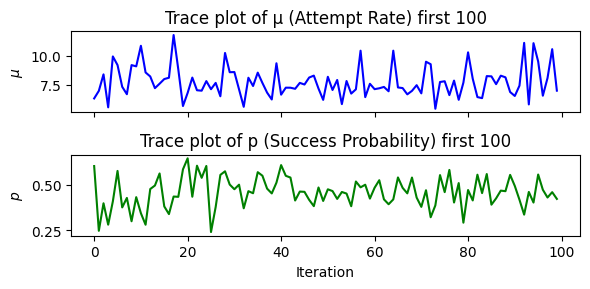

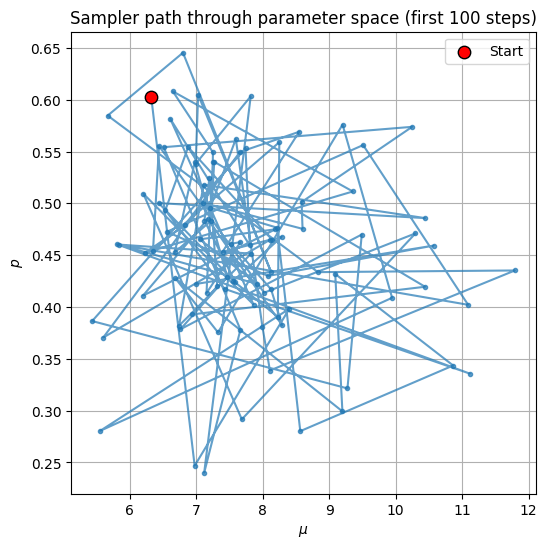

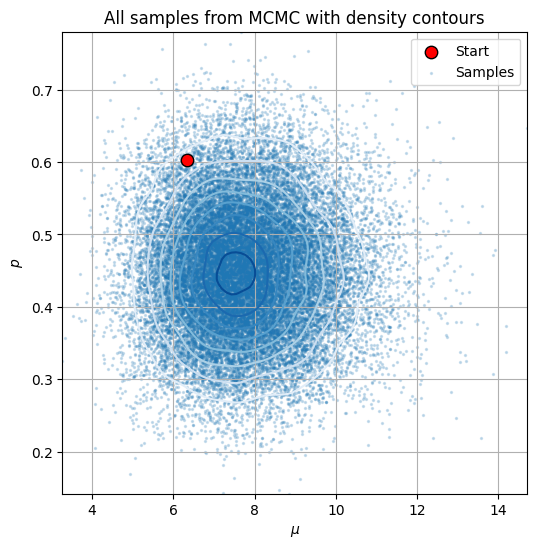

In [45]:
# === Trace plots of mu and p ===
fig, axes = plt.subplots(2, 1, figsize=(6, 3), sharex=True)

show_steps = 100
axes[0].plot(mu_samples[0:show_steps], color='blue')
axes[0].set_ylabel(r'$\mu$')
axes[0].set_title('Trace plot of μ (Attempt Rate) first {}'.format(show_steps))

axes[1].plot(p_samples[0:show_steps], color='green')
axes[1].set_ylabel(r'$p$')
axes[1].set_title('Trace plot of p (Success Probability) first {}'.format(show_steps))
axes[1].set_xlabel('Iteration')

plt.tight_layout()
plt.show()

# === Joint path through parameter space ===
plt.figure(figsize=(6, 6))
plt.scatter(mu_samples[0], p_samples[0], color='red', s=80, label='Start', edgecolors='black', zorder=5)
plt.plot(mu_samples[:show_steps], p_samples[:show_steps], marker='o', markersize=3, linestyle='-', alpha=0.7)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p$')
plt.title(f'Sampler path through parameter space (first {show_steps} steps)')
plt.grid(True)
plt.legend()
plt.show()

# import something to get the contours on the graph
from scipy.stats import gaussian_kde

# Stack samples for 2D KDE
xy = np.vstack([mu_samples, p_samples])
kde = gaussian_kde(xy)

# Create a grid over the domain
xgrid = np.linspace(mu_samples.min(), mu_samples.max(), 100)
ygrid = np.linspace(p_samples.min(), p_samples.max(), 100)
X, Y = np.meshgrid(xgrid, ygrid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

# === Joint samples + density contour plot ===
plt.figure(figsize=(6, 6))
plt.scatter(mu_samples[0], p_samples[0], color='red', s=80, label='Start', edgecolors='black', zorder=5)
plt.scatter(mu_samples, p_samples, marker='o', s=2, alpha=0.2, label='Samples')
plt.contour(X, Y, Z, levels=10, cmap='Blues')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p$')
plt.title('All samples from MCMC with density contours')
plt.grid(True)
plt.legend()
plt.show()

# Can we improve the algorithm 

How can we make the algorithm take better steps towards the optimal $(\mu, p)$ combination? 